<a href="https://colab.research.google.com/github/Mztaroys/Falcon-9-prediction/blob/main/Used_Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd

In [36]:
df=pd.read_csv('train.csv')
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [37]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [38]:
df.drop('id', axis=1, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [40]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0
accident,2452


In [41]:
# Fill missing fuel_type with most common value
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)

# Fill accident with 'Unknown'
df['accident'].fillna(df['accident'].mode()[0], inplace=True)

/tmp/ipython-input-271982279.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)
/tmp/ipython-input-271982279.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [42]:
df['clean_title_flag'] = df['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

In [43]:
df.groupby('clean_title_flag')['price'].mean()

,price
clean_title_flag,
0,63567.566273
1,41354.406704


In [44]:
df['clean_title'].value_counts(dropna=False)

,count
clean_title,
Yes,167114
NaN,21419


not expected! could it be data collection error or high price for slighty-damaged but quality cars? let's check the brands... how many damaged per brand? since we cant check the quality of the damage.

In [45]:
df['accident']


,accident
0,None reported
1,At least 1 accident or damage reported
2,None reported
3,None reported
4,None reported
...,...
188528,None reported
188529,At least 1 accident or damage reported
188530,None reported
188531,None reported


In [46]:
df['clean_title']

,clean_title
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
188528,Yes
188529,Yes
188530,Yes
188531,NaN


In [47]:
# contex-aware inputation
# If a car has been in an accident → assume it doesn't have a clean title
# Otherwise → assume it does


In [48]:
#fill missing clean_title based on accident status
df.loc[(df['clean_title'].isnull()) & (df['accident'].str.lower() == 'yes'), 'clean_title'] = 'NaN'
df['clean_title'] = df['clean_title'].fillna('Yes')

In [49]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


<Axes: xlabel='clean_title'>

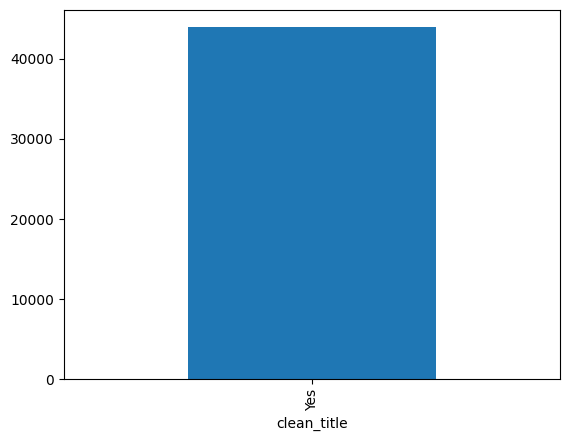

In [50]:
#price vs clean_title FOR CORELLATION WITH PRICE
df.groupby('clean_title')['price'].mean().plot(kind='bar')

In [53]:
print(df['clean_title'].value_counts(dropna=False))

clean_title
Yes    188533
Name: count, dtype: int64


<Axes: xlabel='accident'>

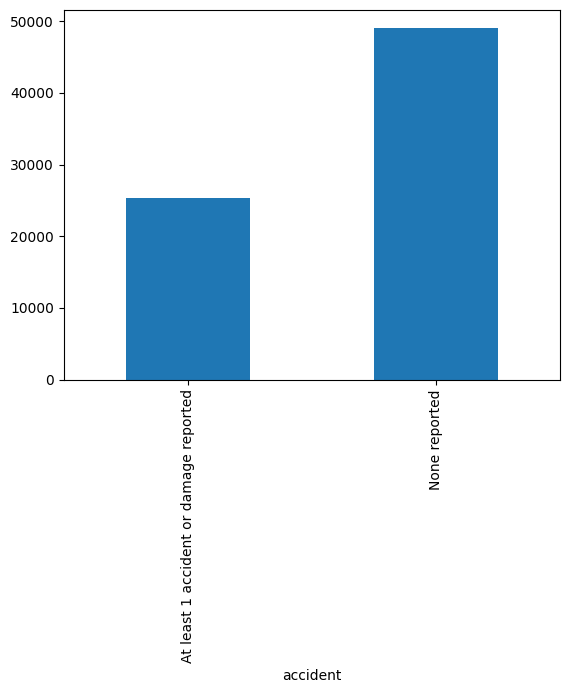

In [52]:
df.groupby('accident')['price'].mean().plot(kind='bar')